In [1]:
import pandas as pd
import altair as alt
from pandas_profiling import ProfileReport

In [2]:
# Handle large data sets by not embedding them in the notebook
alt.data_transformers.enable('data_server')

# Save a PNG blob as a backup for when the Altair plots do not render
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
stock_price_trend_df = pd.read_csv('../data/prices_trends_merged_data.csv')

In [4]:
stock_price_trend_df

,week,weekly_interest,symbol,open,adj_close,Sector
0,2020-07-05,40,FOX,26.940001,24.860155,Communication Services
1,2020-07-12,44,FOX,25.379999,24.732868,Communication Services
2,2020-07-19,44,FOX,25.080000,25.937201,Communication Services
3,2020-07-26,46,FOX,26.379999,25.232225,Communication Services
4,2020-08-02,45,FOX,25.870001,24.370590,Communication Services
...,...,...,...,...,...,...
17467,2021-05-30,55,BLK,887.900024,878.887817,Financials
17468,2021-06-06,79,BLK,888.659973,876.834106,Financials
17469,2021-06-13,42,BLK,881.000000,837.127441,Financials
17470,2021-06-20,67,BLK,849.000000,870.232971,Financials


In [5]:
# Calculating the weekly price change as a percentage
stock_price_trend_df['price_change_pct'] = (stock_price_trend_df['adj_close'] - stock_price_trend_df['open']) / stock_price_trend_df['open']
stock_price_trend_df

,week,weekly_interest,symbol,open,adj_close,Sector,price_change_pct
0,2020-07-05,40,FOX,26.940001,24.860155,Communication Services,-0.077203
1,2020-07-12,44,FOX,25.379999,24.732868,Communication Services,-0.025498
2,2020-07-19,44,FOX,25.080000,25.937201,Communication Services,0.034179
3,2020-07-26,46,FOX,26.379999,25.232225,Communication Services,-0.043509
4,2020-08-02,45,FOX,25.870001,24.370590,Communication Services,-0.057959
...,...,...,...,...,...,...,...
17467,2021-05-30,55,BLK,887.900024,878.887817,Financials,-0.010150
17468,2021-06-06,79,BLK,888.659973,876.834106,Financials,-0.013308
17469,2021-06-13,42,BLK,881.000000,837.127441,Financials,-0.049799
17470,2021-06-20,67,BLK,849.000000,870.232971,Financials,0.025009


In [6]:
# Explore the dataset at a first glance by Pandas Profiling
profile = ProfileReport(stock_price_trend_df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile.to_file("stock-price-trend-eda_pandas-profiling-report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---

By giving a first glance to the dataset, there are 5 features and total 17472 observations with no missing value and no duplicate row. 

`weekly_interest` refers to the `interest over time` data from Google Trends, which is the number of search interests of stocks (`symbol` variable). This number is relative to the highest point for the given period. A value of 100 is the peak popularity for the term and a value of 50 means that the term is half as popular, and a score of 0 means there was not enough data for this term.

For `week`, there are 52 weeks in a row take into the dataset.

For `symbol` variable, there are 336 different stocks take into the dataset.

---

In [8]:
# Calculating the standard deviation of the price change percentage for each stock
stock_price_stds = stock_price_trend_df.groupby(['symbol', 'Sector'], as_index=False).agg({'price_change_pct': 'std'})
stock_price_stds

,symbol,Sector,price_change_pct
0,AAL,Industrials,0.062810
1,AAP,Consumer Discretionary,0.037851
2,AAPL,Information Technology,0.041034
3,ABBV,Health Care,0.030771
4,ABC,Health Care,0.035948
...,...,...,...
331,T,Communication Services,0.030373
332,TAP,Consumer Staples,0.042804
333,TECH,Health Care,0.047673
334,XOM,Energy,0.048730


In [9]:
# Plotting the standard deviations of the price change percentages for all stocks as a distribution
plt_price_stds = alt.Chart(stock_price_stds, title='Distribution of Price Change Volatility').mark_bar().encode(
    x=alt.X('price_change_pct', bin=alt.Bin(maxbins=100), title='Stock Price Weekly Percentage Change (StDev)'),
    y=alt.Y('count()',
            title='Count of Stocks'),
)


In [10]:
# Calculating the standard deviation of the weekly interest on google trends for each stock
stock_trends_stds = stock_price_trend_df.groupby(['symbol', 'Sector'], as_index=False).agg({'weekly_interest': 'std'})
stock_trends_stds

,symbol,Sector,weekly_interest
0,AAL,Industrials,17.817017
1,AAP,Consumer Discretionary,16.372318
2,AAPL,Information Technology,15.370438
3,ABBV,Health Care,17.497716
4,ABC,Health Care,8.776082
...,...,...,...
331,T,Communication Services,5.656454
332,TAP,Consumer Staples,12.784367
333,TECH,Health Care,10.329781
334,XOM,Energy,13.075183


In [11]:
# Plotting the standard deviations of the price change percentages for all stocks as a distribution
plt_trends_stds = alt.Chart(stock_trends_stds,
                            title='Distribution of Stock Interest Volatility').mark_bar().encode(
    x=alt.X('weekly_interest',
              bin=alt.Bin(maxbins=100),
              title='Weekly Google Search Trend (StDev)'),
    y=alt.Y('count()',
              title='Count of Stocks'))

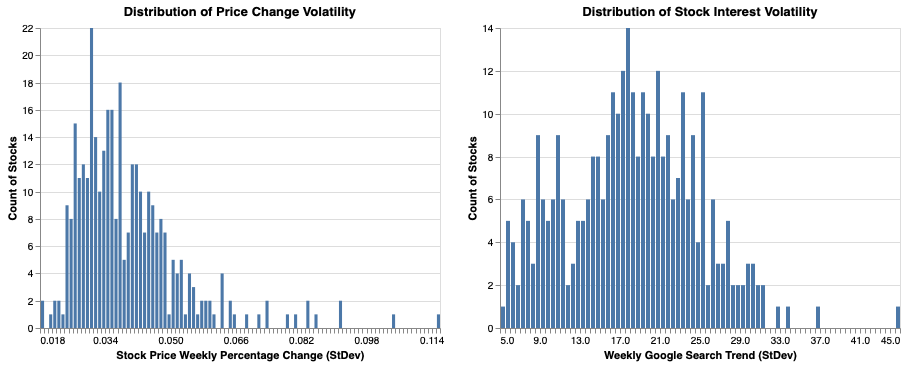

In [12]:
plt_price_stds | plt_trends_stds

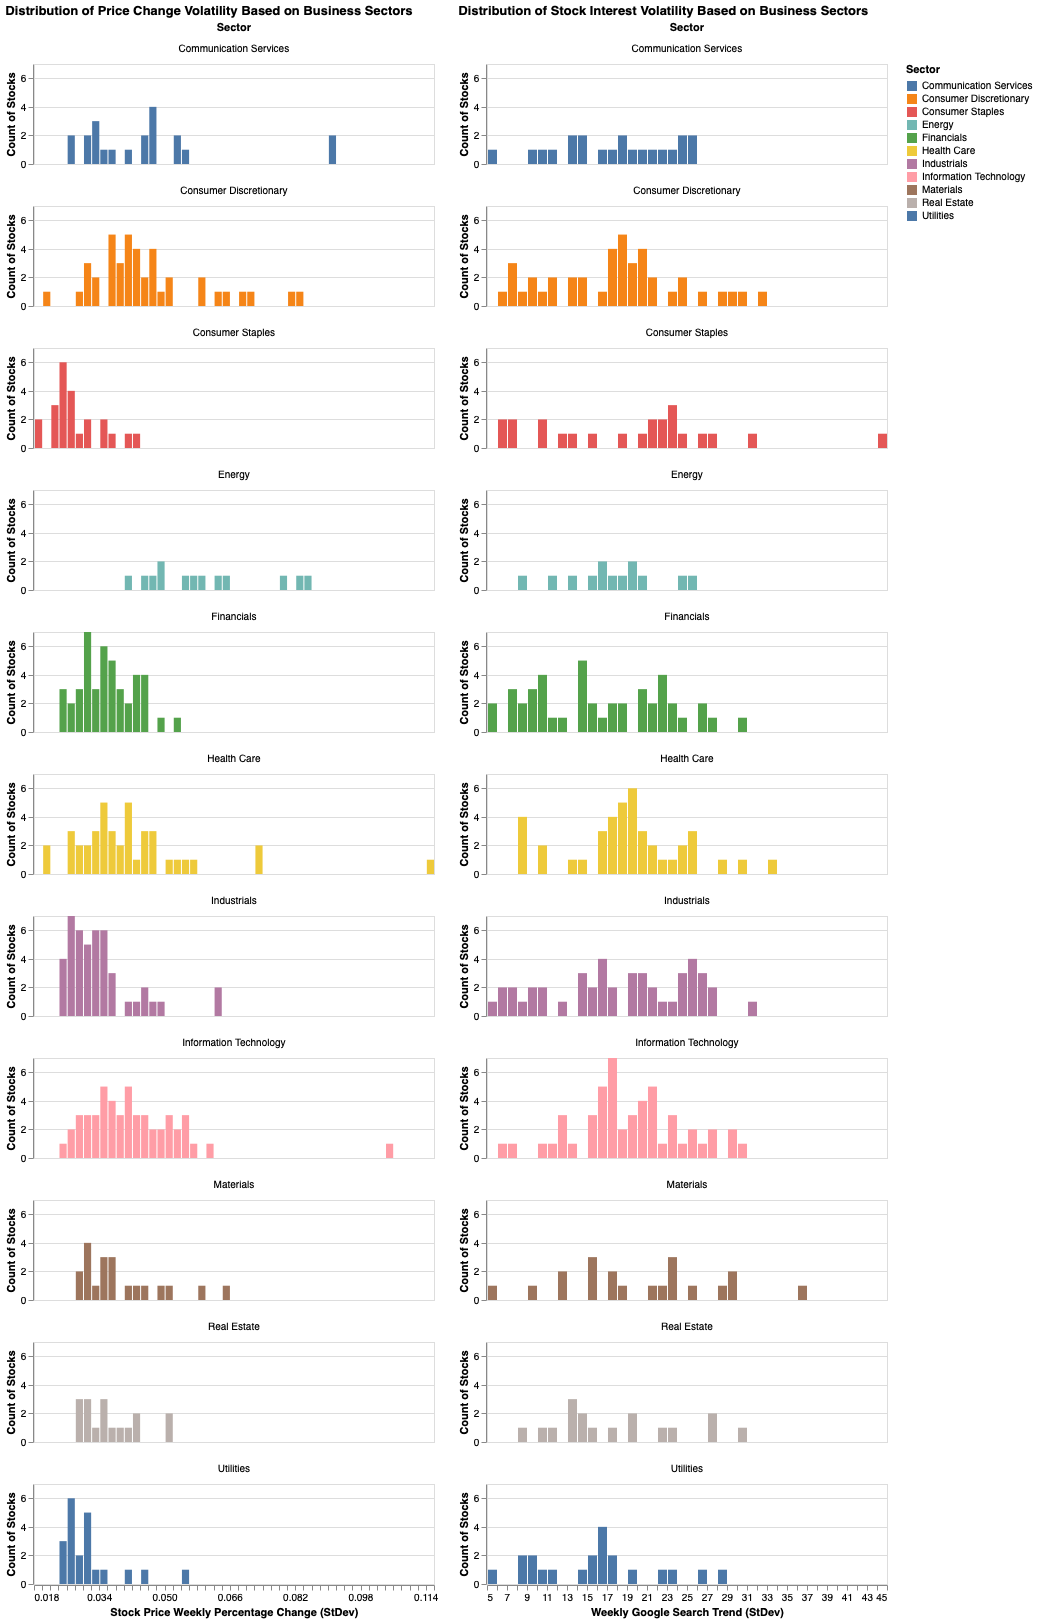

In [13]:
# Plotting the standard deviations of the price change percentages for each business sector as a distribution
plt_sectors_price_stds = alt.Chart(stock_price_stds, title='Distribution of Price Change Volatility').mark_bar().encode(
    x=alt.X('price_change_pct', bin=alt.Bin(maxbins=50), title='Stock Price Weekly Percentage Change (StDev)'),
    y=alt.Y('count()', title='Count of Stocks'),
    color='Sector'
).properties(
    height=100
).facet('Sector', columns=1, title='Distribution of Price Change Volatility Based on Business Sectors')

# Plotting the standard deviations of the price change percentages for each business sector as a distribution
plt_sectors_trends_stds = alt.Chart(stock_trends_stds, title='Distribution of Stock Interest Volatility').mark_bar().encode(
    x=alt.X('weekly_interest', bin=alt.Bin(maxbins=50), title='Weekly Google Search Trend (StDev)'),
    y=alt.Y('count()', title='Count of Stocks'), color='Sector').properties(
    height=100
).facet('Sector', columns=1, title='Distribution of Stock Interest Volatility Based on Business Sectors')

plt_sectors_price_stds | plt_sectors_trends_stds

### Discussion

Above we plot histograms of the standard deviations of returns and trends of around 330 stocks selected from the S&P500.

For the returns, we observe a right-skewed normal distribution. This means that while relatively normally distributed, there are more outliers on the right tail of the distribution than a pure normal distribution.

For the trends, we observe a more normal distribution than for the returns. There may be some evidence of bi-modality in these data, but it could simply be an artifact of the bin selection. If bi-modality exists, there seems to be a smaller cluster of stocks with low trend volatility and a larger cluster of stocks centred around medium trend volatility. 

The question for this basic analysis is if there is a mapping between the variability across these two histograms. Are stocks in the lower side of the return volatility also in the lower side of the trend volatility?

In [14]:
# Calculating the standard deviation of the weekly interest on google trends and price change percentage for each stock
stock_trends_prices_stds = stock_price_trend_df.groupby(['symbol', 'Sector'], as_index=False).agg({'weekly_interest': 'std', 'price_change_pct': 'std'})
stock_trends_prices_stds

,symbol,Sector,weekly_interest,price_change_pct
0,AAL,Industrials,17.817017,0.062810
1,AAP,Consumer Discretionary,16.372318,0.037851
2,AAPL,Information Technology,15.370438,0.041034
3,ABBV,Health Care,17.497716,0.030771
4,ABC,Health Care,8.776082,0.035948
...,...,...,...,...
331,T,Communication Services,5.656454,0.030373
332,TAP,Consumer Staples,12.784367,0.042804
333,TECH,Health Care,10.329781,0.047673
334,XOM,Energy,13.075183,0.048730


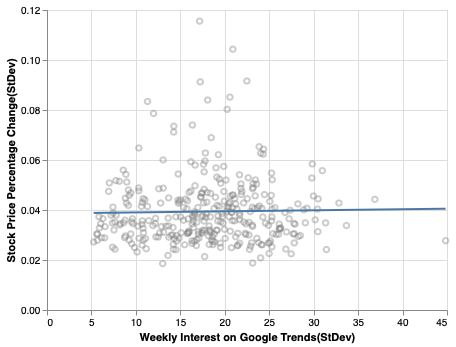

In [15]:
plt_trends_prices_stds = alt.Chart(stock_trends_prices_stds).mark_point(opacity=0.4, color='gray').encode(
    x=alt.X('weekly_interest', title='Weekly Interest on Google Trends(StDev)'),
    y=alt.Y('price_change_pct', title='Stock Price Percentage Change(StDev)')
)

plt_trends_prices_stds + plt_trends_prices_stds.transform_regression('weekly_interest', 'price_change_pct').mark_line()

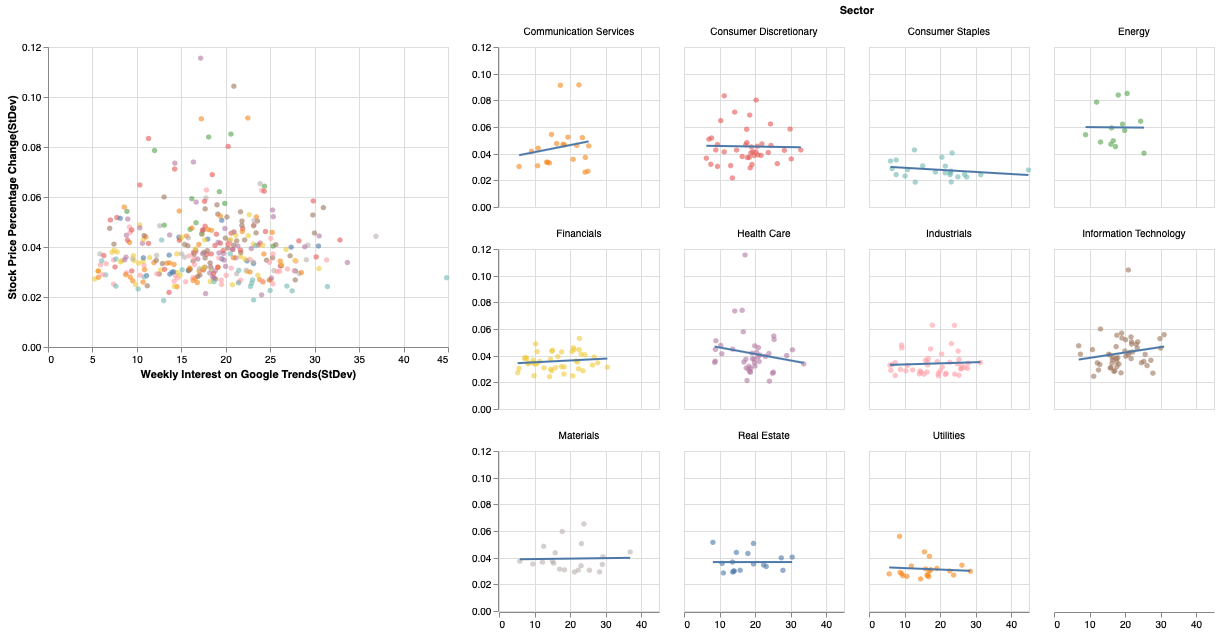

In [16]:
plt_sectors_trends_prices_stds = alt.Chart(stock_trends_prices_stds).mark_point(opacity=0.6, filled=True).encode(
    x=alt.X('weekly_interest', title='Weekly Interest on Google Trends(StDev)'),
    y=alt.Y('price_change_pct', title='Stock Price Percentage Change(StDev)'),
    color = 'Sector'
)

plt_trends_prices_stds_sector = alt.Chart(stock_trends_prices_stds).mark_point(opacity=0.6, filled=True).encode(
    x=alt.X('weekly_interest', title=''),
    y=alt.Y('price_change_pct', title=''),
    color=alt.Color('Sector', legend=None)
)

plt_trends_prices_sector_faceted = (plt_trends_prices_stds_sector + 
    plt_trends_prices_stds_sector.transform_regression('weekly_interest', 'price_change_pct').properties(
     height=160,
     width=160
).mark_line()).facet('Sector', columns=4)

alt.hconcat(plt_sectors_trends_prices_stds, plt_trends_prices_sector_faceted).configure_legend(labelFontSize=0, symbolSize=0, title=None)

### Discussion

From the basic regression analysis, we do not observe an obvious trend in the data. It seems as if information on search trend volatility provides remarkably little information on the return volatility. 

While these results are not promising, as discussed in the project proposal, we can perhaps assess this relationship on particular clusters of stocks to see if a relationship exists for certain categories (i.e. tech stocks). 

We can also look to expand our features of search volatility. For example, while we use stock tickers for this EDA, we can perhaps use the company names or other adjacent searches in our volatility analysis. 